In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [162]:
# Load the CSV file
file_path = 'CarPrice_Assignment.csv'
car_data = pd.read_csv(file_path)
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [192]:
# Summary statistics for numerical columns
print(car_data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [193]:
# Summary statistics for categorical columns
print(car_data.describe(include=['object']))

              CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94  


In [194]:
# Check for missing values
print(car_data.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [195]:
# Drop rows with any missing values
car_data_cleaned = car_data.dropna()

# Display basic information after dropping missing values
print(car_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

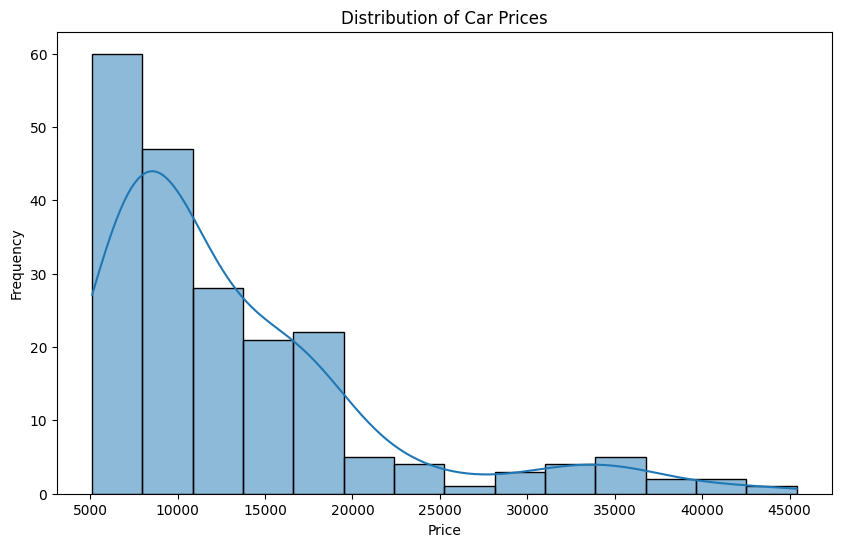

In [235]:
# Distribution plot of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [236]:
# Encoding categorical features for correlation heatmap
encoded_car_data = car_data_cleaned.copy()
for col in encoded_car_data.select_dtypes(include=['object']).columns:
    encoded_car_data[col] = encoded_car_data[col].astype('category').cat.codes


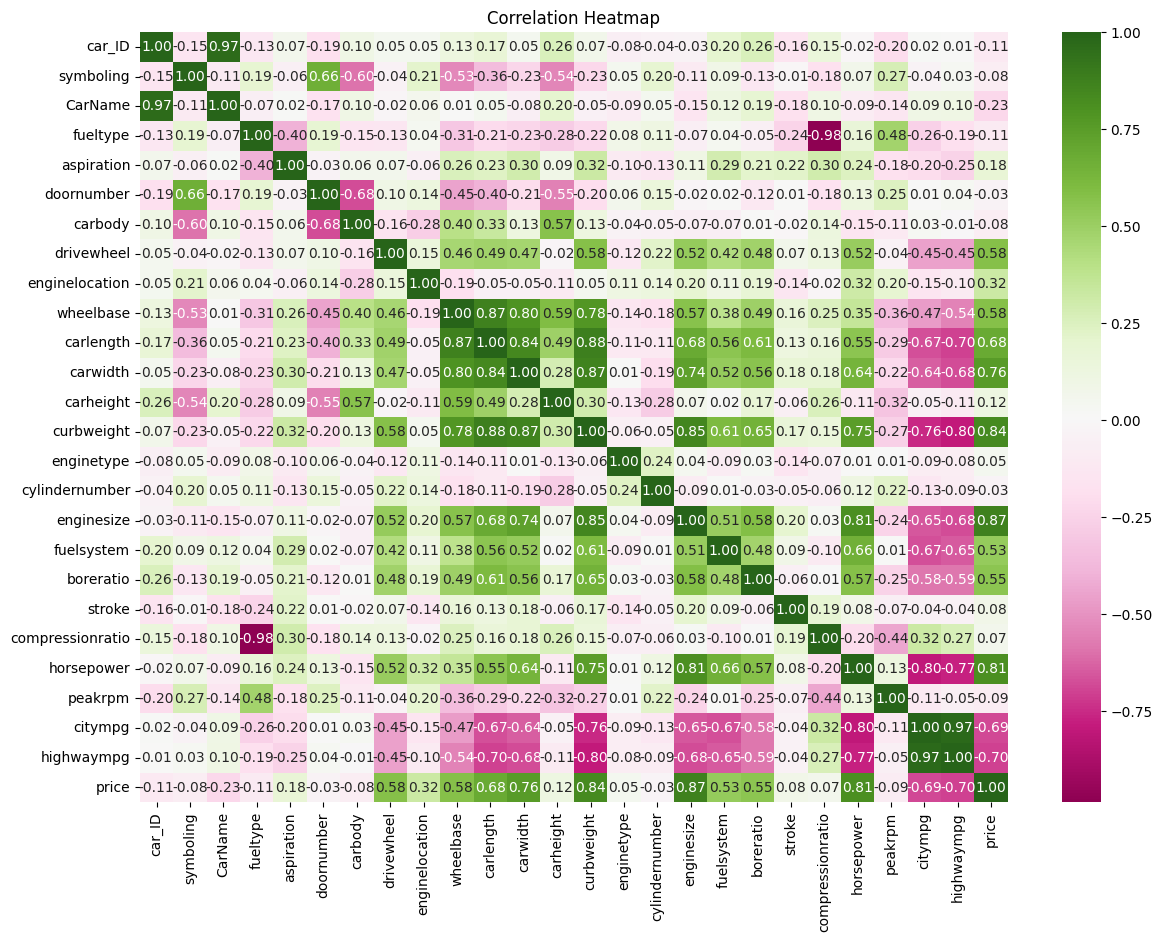

In [237]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_car_data.corr(), annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [238]:
# Drop rows with any missing values
car_data_cleaned = car_data.dropna()

In [239]:
# Define the feature set (X) and the target variable (y)
X = car_data_cleaned.drop(columns=['car_ID', 'CarName', 'price'])
y = car_data_cleaned['price']

In [240]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [241]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [242]:
# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

In [243]:
# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [244]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [245]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

In [246]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

In [247]:
# Create a dictionary to store the results
results = {}
predictions_dict = {}

In [248]:
# Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    mse, r2, predictions = evaluate_model(pipeline, X_test, y_test)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R^2': r2}
    predictions_dict[model_name] = predictions

# Display the results
results

C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.353e+07, tolerance: 8.716e+05
  model = cd_fast.enet_coordinate_descent(


{'Linear Regression': {'MSE': 7834369.107527975, 'R^2': 0.8869244515927176},
 'Ridge Regression': {'MSE': 9527607.887746366, 'R^2': 0.8624854826049408},
 'Lasso Regression': {'MSE': 8167051.591097546, 'R^2': 0.8821227561710685}}

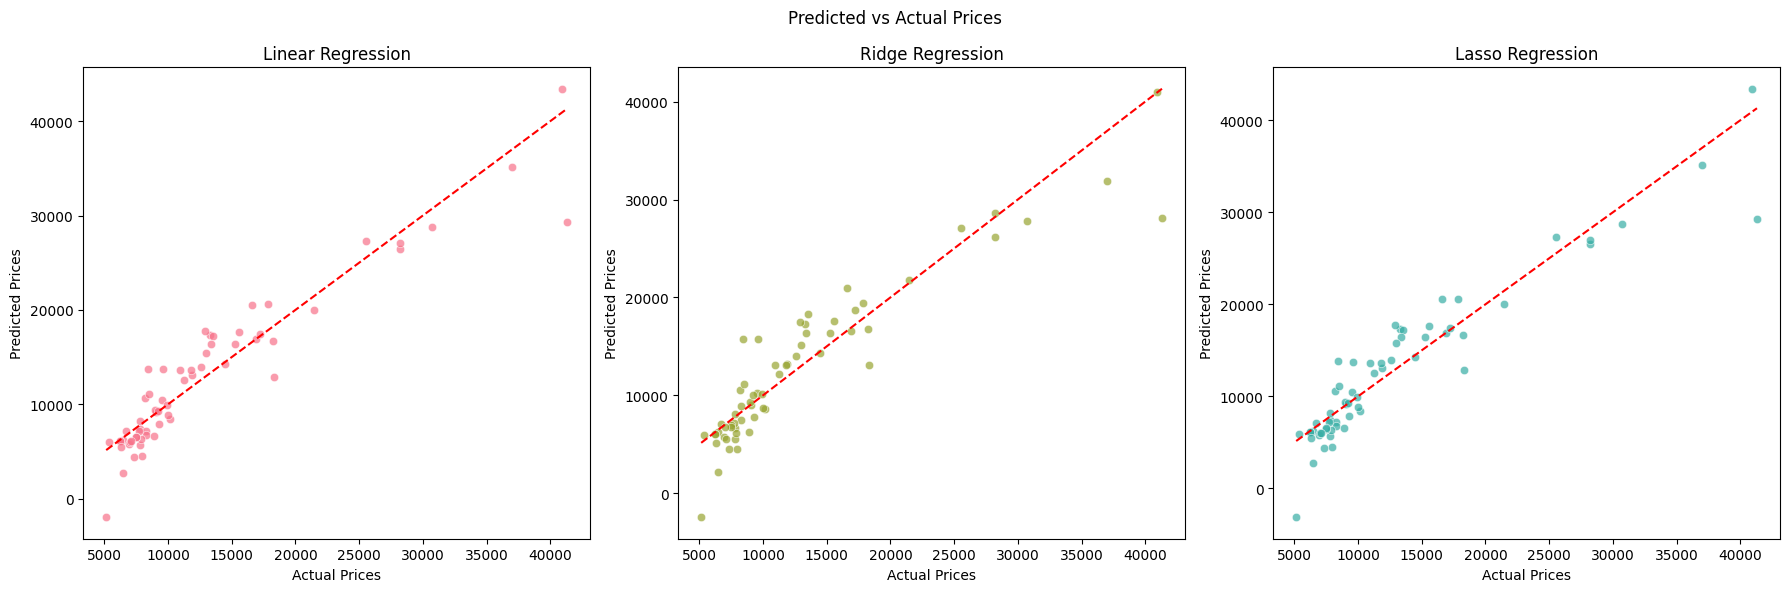

In [249]:
# Visualization: Distribution of predicted vs actual prices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Predicted vs Actual Prices')

palette = sns.color_palette("husl", 4)

for i, (model_name, predictions) in enumerate(predictions_dict.items()):
    sns.scatterplot(x=y_test, y=predictions, ax=axes[i], alpha=0.7, color=palette[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Prices')
    axes[i].set_ylabel('Predicted Prices')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

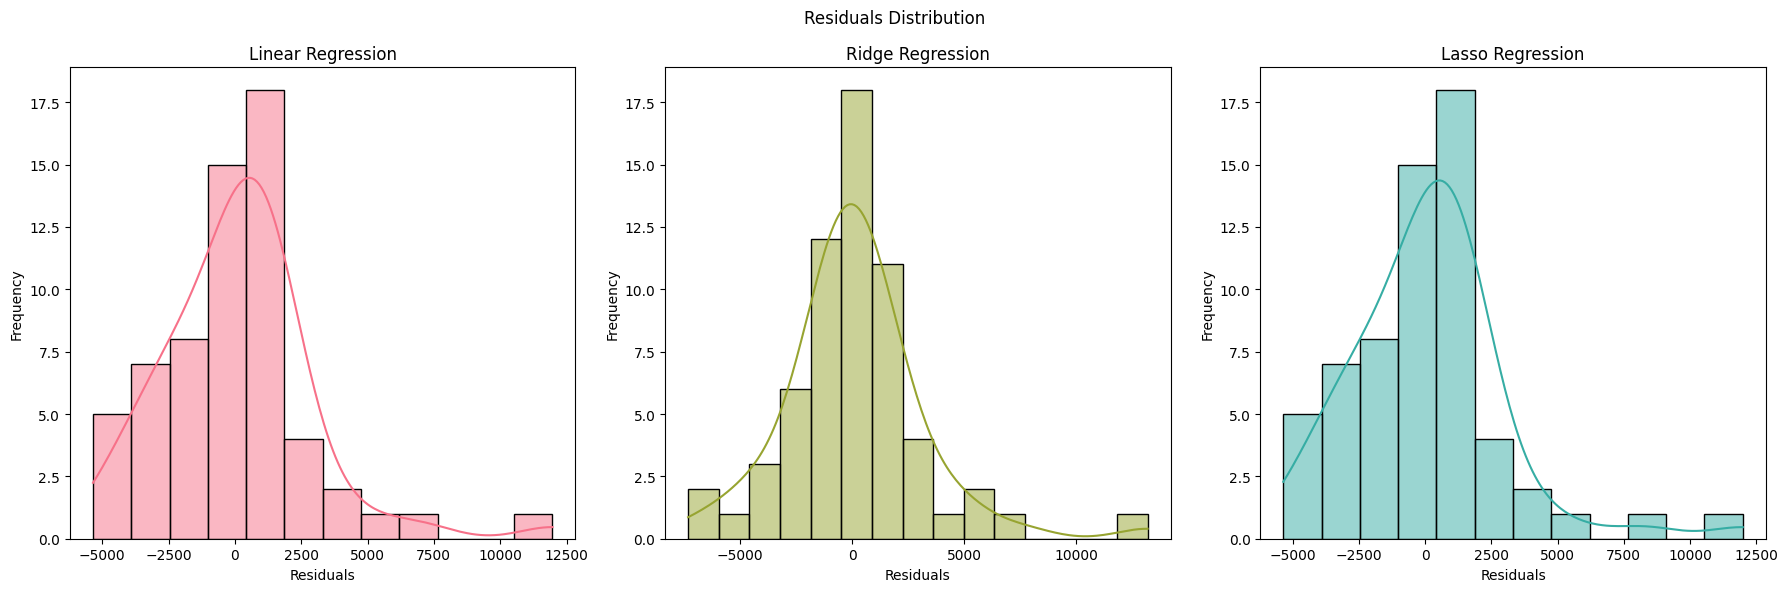

In [250]:
# Visualization: Residuals distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residuals Distribution')

for i, (model_name, predictions) in enumerate(predictions_dict.items()):
    residuals = y_test - predictions
    sns.histplot(residuals, kde=True, ax=axes[i], color=palette[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Residuals')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


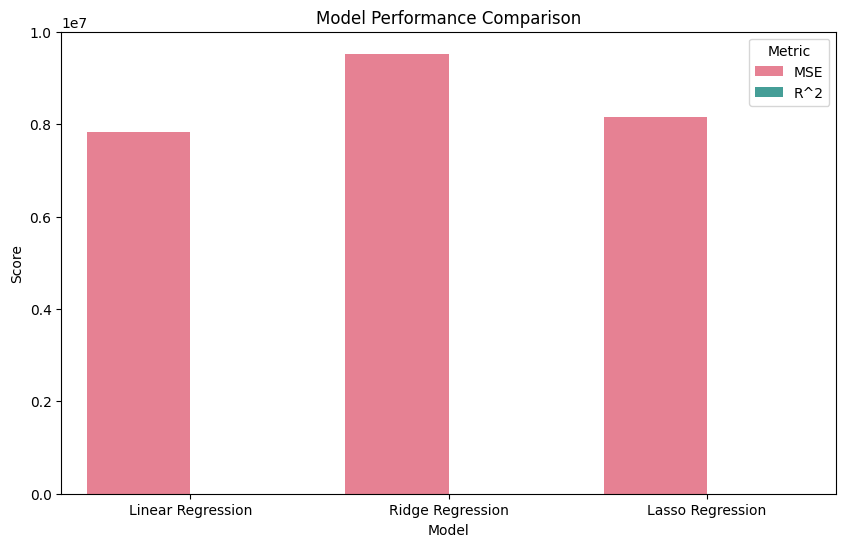

In [251]:
# Visualization: Model performance comparison
performance_df = pd.DataFrame(results).T.reset_index().melt(id_vars='index')
performance_df.columns = ['Model', 'Metric', 'Value']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df, palette="husl")
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()